# Galaxy zoo
The images are stored in the ```galaxy_zoo_images``` directory. We are going to load some galaxies from this, and point to some tutorials for how to handle image datasets in tensorflow.

First we will import some useful libraries for viewing images and loading data.

In [73]:
import PIL
import PIL.Image
import pathlib

Now we will define a pathlib object. These kind of objects make handling paths to files much easier, and are much easier to deal with than defining a string that defines the path.

In [74]:
image_dir = pathlib.Path('galaxy_zoo_images')

One of the nice things we can do with a pathlib object is ```glob``` all of the files that match a certain pattern in the directory. This will return a python generator that we can cast to a list of files. This list will contain all the files (as path objects) in the ```image_dir``` that match the pattern we specify (in this cas ```'.jpg'``` ie) any jpg file).

In [75]:
images = image_dir.glob('*.jpg')
image_list = list(images)
print(image_list[:2])

[PosixPath('galaxy_zoo_images/100813.jpg'), PosixPath('galaxy_zoo_images/101660.jpg')]


Now you can plot as many galaxy images as you want.

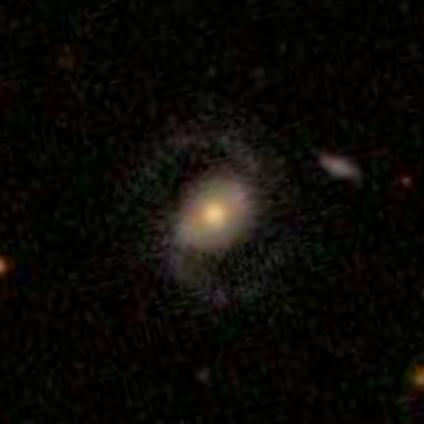

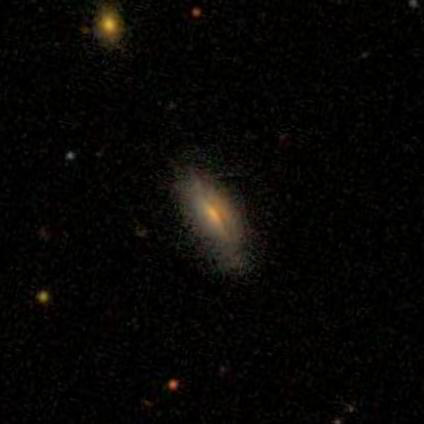

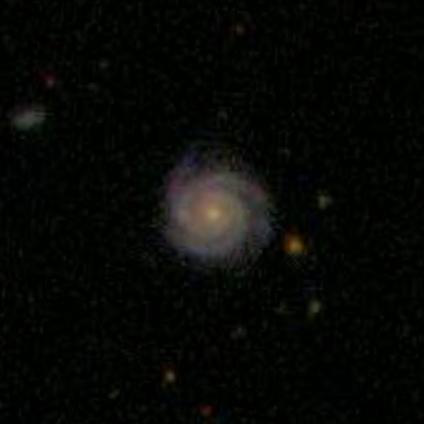

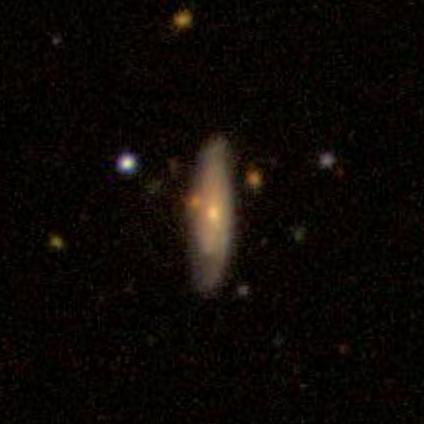

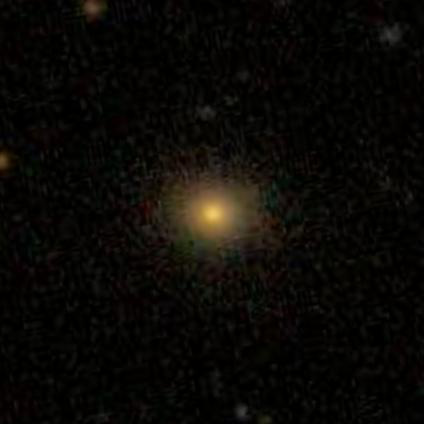

In [76]:
n_plot = 5
for i in range(n_plot):
    display(PIL.Image.open(str(image_list[i])))

The task for this project is to classify these images. The first task is to do three class classification.

There are many good tutorials on how to deal with tensorflow datasets. 

We aren't going to tell you much more about these images, except to say that they are rotationally symmetric, and have different levels of bluriness.

In [77]:
import pandas as pd
# Another nice feature of pathlib objects is that the / operator will join strings as directories
labels = pd.read_csv(image_dir / 'exercise_1_labels.csv')

In [78]:
labels = labels.set_index('GalaxyID')
labels.head()

,Class1.1,Class1.2,Class1.3
GalaxyID,,,
100090,1.0,0.0,0.0
100134,0.0,1.0,0.0
100237,0.0,1.0,0.0
100263,0.0,1.0,0.0
100322,0.0,1.0,0.0


We need to take the labels for this dataset and order them in the same way as the list of images we have grabbed from the image folder. We can get the ID of each file with the ```.stem``` attribute of the path object and cast it to an int so that it matches the id in the dataframe.

In [79]:
ordering = [int(f.stem) for f in image_list if int(f.stem) in labels.index]

In [87]:
numpy_labels = labels.loc[ordering].to_numpy()

In [88]:
import tensorflow as tf 
tf.convert_to_tensor(numpy_labels)

<tf.Tensor: shape=(128, 3), dtype=float64, numpy=
array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
     

In [94]:
image_list = [str(f) for f in image_list] 
image_paths = tf.convert_to_tensor(image_list, dtype=tf.string)
dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))

ValueError: Dimensions 135 and 128 are not compatible